In [2]:
import model_unet
import config
import numpy as np
import matplotlib.pyplot as plt

## Load Model and Weights

In [3]:
class_number = 1
model = model_unet.get_unet()
model.load_weights(f'weights/weights_class{class_number}.h5')

## Visualize Test Image and Make Prediction

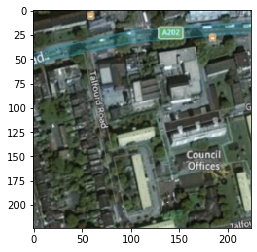

In [4]:
import cv2
scale = 1000
test_img = cv2.imread("samples/CAPTURE.JPG")
test_img = cv2. resize(test_img, (224,224))
plt.imshow(test_img)
test_img = test_img/scale
test_img = config.post_normalize_image(test_img)
test_img = np.array(test_img, dtype = 'float32')
result = model.predict(test_img.reshape(1,224,224,3))

## Visualize Prediction

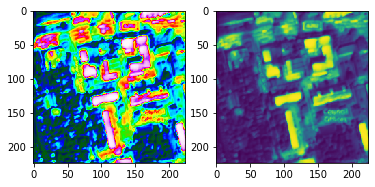

In [5]:
result=result[:,:,:,0]
plt.subplot(1,2,1)
plt.imshow(result.reshape(224,224), cmap=plt.get_cmap('gist_ncar'))
plt.subplot(1,2,2)
plt.imshow(result.reshape(224,224))

<h2>Remove Less Intense Pixels</h2>

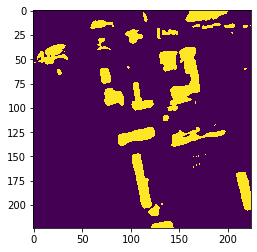

In [6]:
temp = result.copy()
temp = temp.reshape(224,224)
temp=temp>0.75
plt.imshow(temp)